## Assessment / Midterm: Machine Vision and Deep Learning
<span style="color:blue">
    
1) Answer all questions
    
2) This assessment is open-book. You are allowed to refer to any references including online materials, books, notes, codes, github links, etc

3) Copy this notebook to your google drive (click **FILE** > **save a copy in Drive**)

4) Upload the **answer notebook & trained model** (for Question 3) to your github.

5) Submit the assessment by sharing the link to your github containing the answers.
    
</span>

**QUESTION 1 [15 marks]**

a) Let *k*, *s* and *p* be 4, 2 and 1, respectively. What will be the shape of the output of the convolutional layer? (2 marks)

>>import torch \
import torch.nn as nn \
input_img = torch.rand(1,3,10,10) \
layer = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=*k*, stride=*s*, padding=*p*)

<span style="color:blue">
    answer: The shape of the output is torch.Size([1, 12, 5, 5])
</span>

In [8]:
import torch
import torch.nn as nn

input_img = torch.rand(1, 3, 10, 10)
layer = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=4, stride=2, padding=1)

output = layer(input_img)

print(output.shape)


torch.Size([1, 12, 5, 5])


b) Batch Normalization (BN) normalizes the mean and standard deviation for each: (tick X for the correct answer(s)) (2 marks)

 - [X] Individual feature map
 - [ ] Instance in the mini-batch
 - [ ] Spatial dimension    

c) Which one of the following is not an advantage of Batch Normalization (BN)? (tick X for the correct answer(s)) (2 marks)

- [ ] BN accelerates the training of deep neural networks and tackles the vanishing gradient problem.
- [ ] For every input mini-batch, we calculate different statistics. This introduces some sort of regularization.
- [ ] BN reduces the dependence of gradients on the scale of the parameters or of their initial values.
- [x] BN needs a much slower learning rate for the total architecture to converge.

d) Choose the correct statement. (tick X for the correct answer) (2 marks)

- [x] A larger kernel is preferred for information that resides globally, and a smaller kernel is preferred for information that is distributed locally.
- [ ] A larger kernel is preferred for information that resides locally, and a smaller kernel is preferred for information that is distributed globally.

e) In the following network, how many learnable parameters (weights) are there? (2 marks)

In [6]:
model = nn.Sequential(
        nn.Linear(3,20),
        nn.ReLU(),
        nn.Linear(20,2)
    )

In [7]:
import torch
import torch.nn as nn

# Define your neural network model
model = nn.Sequential(
    nn.Linear(3, 20),
    nn.ReLU(),
    nn.Linear(20, 2)
)

# Count the total number of learnable parameters
total_params = sum(p.numel() for p in model.parameters())
print(f"Total learnable parameters: {total_params}")


Total learnable parameters: 122


<span style="color:blue">
    answer: There are 122 learnable parameters.
</span>

f) Which of the following statements are true about deep neural networks? (tick X for the correct answer) (2 marks)

- [X] Deep neural networks usually require a big amount of data to be properly trained.
- [X] They can be fooled by adversarial/ noisy examples.
- [X] They are difficult to interpret and understand.
- [X] They can still be subject to biases.
- [ ] They fail to understand the context of the data that they are handling.
- [X] They perform very well on individual tasks but fail to generalize to many different tasks.

g) Run the code in the next cell.

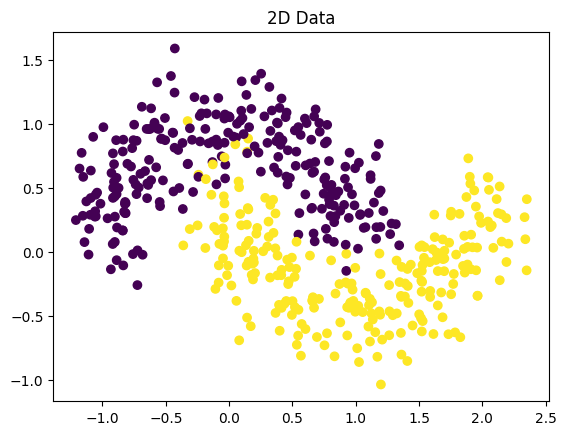

In [9]:
# import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline

# generate synthetic data in 2D
X, Y = make_moons(500, noise=0.2)

# plot the data
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('2D Data')
plt.show()

Can this data be correctly separable using the classifier below? Why? (3 marks)

model = nn.Sequential( \
    nn.Linear(n_input_dim, n_output), \
    nn.Sigmoid() \
    )
    
<span style="color:blue">
    answer:
</span>

**QUESTION 2 [40 marks]**

The COVID-19 pandemic continues to have a devastating effect on the health and well-being of the global population. A critical step in the fight against COVID-19 is effective screening of infected patients, with one of the key screening approaches being radiology examination using chest radiography. As a deep learning engineer, you are tasked to classify a dataset of X-ray images as either "normal", "covid" or "viral pneumonia". Use the chest X-ray dataset publicly available at https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset to answer the following questions.


a) Create and train a ConvNet corresponding to the following architecture in Fig. 1 (with modifications of the input and final layers). Please include **(10 marks)**:

    1) The dataloader to load the train and test datasets.

    2) The model definition (either using sequential method OR pytorch class method).

    3) Define your training loop.

    4) Output the mean accuracy for the whole testing dataset.

![pic](https://raw.githubusercontent.com/CUTe-EmbeddedAI/images/main/images/LeNet.png)
    
                                Fig. 1: A convolutional neural network

In [1]:
# IMPORT LIBRARY = TORCH, TORCHVISION (FOR CIFAR-10)
import torch
from torch import nn

import torchvision
from torchvision import datasets, models
import torch.optim as optim
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt        #for plotting purpose

In [2]:
# IMPORT FROM GDRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Set random seed for reproducibility
torch.manual_seed(42)

In [4]:
# Setting Up the Hyperparameters
batch_size = 64
learning_rate = 0.001
epochs = 10

In [5]:
# LOAD THE 'FRUITS' DATASET

transform = transforms.Compose(
    #  transforms.Augmix(),
    #  transforms.CenterCrop(),
    [transforms.Resize((32,32)),
     transforms.ToTensor(),
     transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])]
)

# # Define a new transform that resizes to 32x32 and converts to grayscale
# new_transform = transforms.Compose([
#     transforms.Resize((32, 32)),  # Resize to 32x32
#     transforms.Grayscale(num_output_channels=1),  # Convert to grayscale (1 channel)
#     transforms.ToTensor(),  # Convert to tensor
#     transforms.Normalize([0.485], [0.229])  # Normalize if needed
# ])
train_dir = '/content/drive/MyDrive/Colab Notebooks/Covid19-dataset/train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/Covid19-dataset/test'

# train_dir = '/content/drive/MyDrive/Colab Notebooks/Pencil/train'
# test_dir = '/content/drive/MyDrive/Colab Notebooks/Pencil/test'

# train_dir = 'C:/Users/Muhd Raaid/Downloads/Compressed/Pencil//train'
# test_dir = 'C:/Users/Muhd Raaid/Downloads/Compressed/Pencil/test'



train_data = datasets.ImageFolder(root=train_dir,
                                  transform = transform)

test_data = datasets.ImageFolder(root=test_dir,
                                  transform = transform)

In [6]:
class_names = train_data.classes
class_names

['Covid', 'Normal', 'Viral Pneumonia']

In [7]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data,batch_size=4, shuffle=True)

test_dataloader = DataLoader(test_data,batch_size=4, shuffle=False)

In [8]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([4, 3, 32, 32]), torch.Size([4]))

In [9]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# class SimpleCNN(nn.Module):
#     def __init__(self, num_classes=10):  # Adjusted for 10 classes
#         super(SimpleCNN, self).__init__()
#         # Convolutional layers
#         self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1)
#         self.bn1 = nn.BatchNorm2d(64)
#         self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
#         self.bn2 = nn.BatchNorm2d(128)
#         self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
#         self.bn3 = nn.BatchNorm2d(256)

#         # Pooling layer
#         self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

#         # Dropout
#         self.dropout = nn.Dropout(0.5)

#         # Fully connected layers
#         # The input features for fc1 depends on the output size of the last pooling layer
#         self.fc1 = nn.Linear(256 * 28 * 28, 1024)
#         self.fc2 = nn.Linear(1024, num_classes)  # Output features set to num_classes

#     def forward(self, x):
#         # Convolutional layers with ReLU and batch normalization
#         x = F.relu(self.bn1(self.conv1(x)))
#         x = self.pool(x)
#         x = F.relu(self.bn2(self.conv2(x)))
#         x = self.pool(x)
#         x = F.relu(self.bn3(self.conv3(x)))
#         x = self.pool(x)

#         # Flatten the output for the fully connected layers
#         x = x.view(-1, 256 * 28 * 28)  # Adjust the size here to match the output of the last pool

#         # Fully connected layers with dropout
#         x = F.relu(self.fc1(x))
#         x = self.dropout(x)
#         x = self.fc2(x)

class ModifiedCNN(nn.Module):
    def __init__(self, num_classes=3):
        super(ModifiedCNN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)

        # Max-pooling layers
        self.pool = nn.MaxPool2d(kernel_size=2)

        # Fully connected layers
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, num_classes)  # Change the output size to num_classes

    def forward(self, x):
        # Convolutional layers with ReLU and max-pooling
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)

        # Flatten the output for the fully connected layers
        x = x.view(-1, 16 * 5 * 5)

        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x

# Instantiate the model for 3 classes
model = ModifiedCNN(num_classes=3)

print(model)



ModifiedCNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=3, bias=True)
)


In [17]:
import torch
torch.cuda.is_available()

True

In [18]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(),
                             lr=0.001, momentum = 0.09)
# move the model to GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

ModifiedCNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=3, bias=True)
)

In [19]:
import time
from tqdm.auto import tqdm

def train_and_validate(model, loss_criterion, optimizer, train_dataloader, test_dataloader, epochs=25, device='cuda'):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param train_dataloader: DataLoader for training data
        :param test_dataloader: DataLoader for test/validation data
        :param epochs: Number of epochs (default=25)
        :param device: Device to perform computations ('cuda' or 'cpu')

    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''

    start = time.time()
    history = []
    best_acc = 0.0

    for epoch in tqdm(range(epochs)):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))

        model.train()

        train_loss = 0.0
        train_acc = 0.0

        valid_loss = 0.0
        valid_acc = 0.0

        for i, (inputs, labels) in enumerate(train_dataloader):

            inputs = inputs.to(device)
            labels = labels.to(device)

            # Clean existing gradients
            optimizer.zero_grad()

            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)

            # Compute loss
            loss = loss_criterion(outputs, labels)

            # Backpropagate the gradients
            loss.backward()

            # Update the parameters
            optimizer.step()

            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)

            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))

            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))

            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)

        # Validation - No gradient tracking needed
        with torch.no_grad():

            model.eval()

            # Validation loop
            for j, (inputs, labels) in enumerate(test_dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)


        # Find average training loss and training accuracy
        avg_train_loss = train_loss / len(train_dataloader.dataset)
        avg_train_acc = train_acc / len(train_dataloader.dataset)

        # Find average validation loss and training accuracy
        avg_test_loss = valid_loss / len(test_dataloader.dataset)
        avg_test_acc = valid_acc / len(test_dataloader.dataset)

        history.append([avg_train_loss, avg_test_loss, avg_train_acc, avg_test_acc])

        epoch_end = time.time()

        print("Epoch : {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(epoch, avg_train_loss, avg_train_acc * 100, avg_test_loss, avg_test_acc * 100, epoch_end - epoch_start))

        # Save if the model has best accuracy till now
        if avg_test_acc > best_acc:
            best_acc = avg_test_acc
            best_model = model
            torch.save(best_model, 'best_model.pt')

    return best_model, history


In [20]:
# Train the model for 10 epochs

num_epochs = 10
model, history = train_and_validate(model, loss_fn, optimizer, train_dataloader, test_dataloader, num_epochs)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1/10
Epoch : 000, Training: Loss: 1.0956, Accuracy: 32.2709%, 
		Validation : Loss : 1.0807, Accuracy: 46.9697%, Time: 147.3550s
Epoch: 2/10
Epoch : 001, Training: Loss: 1.0730, Accuracy: 51.7928%, 
		Validation : Loss : 1.0662, Accuracy: 57.5758%, Time: 10.5910s
Epoch: 3/10
Epoch : 002, Training: Loss: 1.0532, Accuracy: 54.9801%, 
		Validation : Loss : 1.0502, Accuracy: 60.6061%, Time: 10.7834s
Epoch: 4/10
Epoch : 003, Training: Loss: 1.0297, Accuracy: 74.1036%, 
		Validation : Loss : 1.0314, Accuracy: 50.0000%, Time: 10.5411s
Epoch: 5/10
Epoch : 004, Training: Loss: 1.0021, Accuracy: 59.3625%, 
		Validation : Loss : 1.0023, Accuracy: 54.5455%, Time: 10.7438s
Epoch: 6/10
Epoch : 005, Training: Loss: 0.9628, Accuracy: 66.5339%, 
		Validation : Loss : 0.9618, Accuracy: 62.1212%, Time: 10.5445s
Epoch: 7/10
Epoch : 006, Training: Loss: 0.9092, Accuracy: 81.6733%, 
		Validation : Loss : 0.9069, Accuracy: 69.6970%, Time: 10.6021s
Epoch: 8/10
Epoch : 007, Training: Loss: 0.8359, Accur

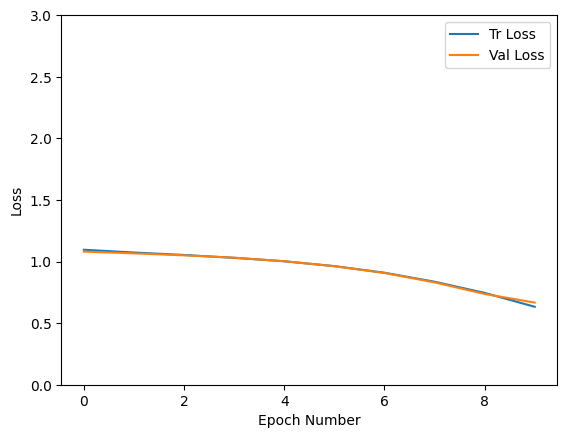

In [21]:
#Analyze the loss curve

def plot_loss(history):
  history = np.array(history)
  plt.plot(history[:,0:2])
  plt.legend(['Tr Loss', 'Val Loss'])
  plt.xlabel('Epoch Number')
  plt.ylabel('Loss')
  plt.ylim(0,3)
  # plt.savefig('cifar10_loss_curve.png')
  plt.show()

plot_loss(history)

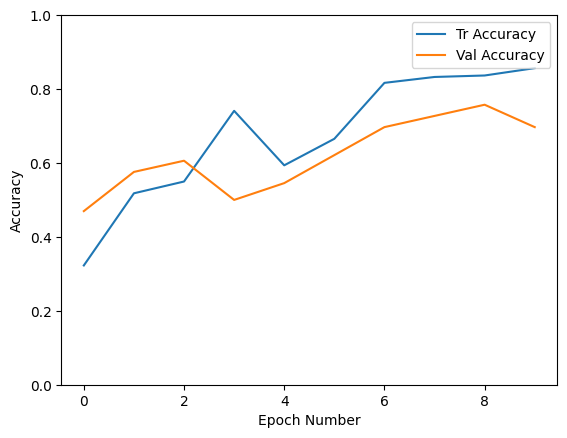

In [22]:
def plot_accuracy(history):
  history = np.array(history)
  plt.plot(history[:,2:4])
  plt.legend(['Tr Accuracy', 'Val Accuracy'])
  plt.xlabel('Epoch Number')
  plt.ylabel('Accuracy')
  plt.ylim(0,1)
  # plt.savefig('cifar10_accuracy_curve.png')
  plt.show()

plot_accuracy(history)

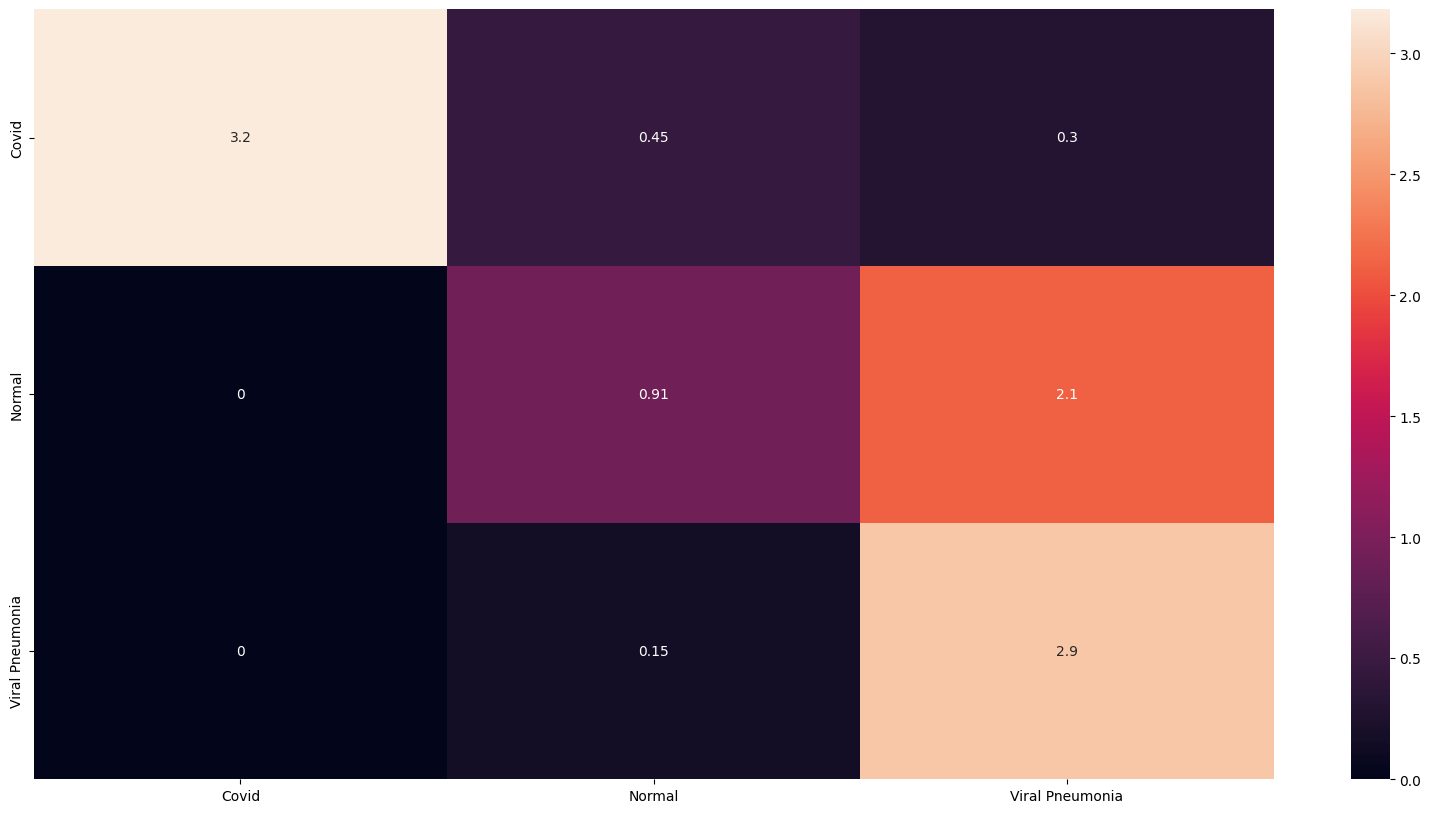

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

def plot_confusionMatrix(model, test_dataloader):

  y_pred = []
  y_true = []

  model.to('cpu')

  # iterate over test data
  for inputs, labels in test_dataloader:
          output = model(inputs) # Feed Network

          output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
          y_pred.extend(output) # Save Prediction

          labels = labels.data.cpu().numpy()
          y_true.extend(labels) # Save Truth

  # Build confusion matrix
  cf_matrix = confusion_matrix(y_true, y_pred)
  df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in class_names],
                      columns = [i for i in class_names])
  plt.figure(figsize = (20,10))
  sn.heatmap(df_cm, annot=True)
  # plt.savefig('output.png')

plot_confusionMatrix(model, test_dataloader)

b) Based on Question 2 a), answer the following questions:
    
    i) Is the model overfitting? Why? (4 marks)
   <font color='white'>Yes. Because both training and validation accuracy are diverging from each other, and there is a clear indication of overfitting since the validation accuracy plummet as the epochs increase. It is noted however the overfitting is not too significant as the training and validation loss are both decreasing and remain close to one another without the validation loss increasing or diverging significantly from the training loss.</font>
    
    ii) Propose two methods to reduce the effect of overfitting. (4 marks)
   <font color='white'>Two methods that I propose are: (1) Batch Normalization as it can help reduce overfitting by stabilizing the learning process (2) Dropout because it will randomly zero some of the outputs of the layers during training, which helps to prevent the model from becoming too dependent on any single neuron </font>
   
    iii) Implement the two proposed methods in Q2 b) ii) in the next cell and show that the overfitting has been reduced. (8 marks)

In [48]:
import torch.nn as nn
import torch.nn.functional as F

class ModifiedCNN(nn.Module):
    def __init__(self, num_classes=3):
        super(ModifiedCNN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)

        # Max-pooling layers
        self.pool = nn.MaxPool2d(kernel_size=2)

        # Implementing Batch Normalization
        self.batch_norm1 = nn.BatchNorm2d(6)
        self.batch_norm2 = nn.BatchNorm2d(16)

        # Fully connected layers
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        # Adding Dropout with p=0.5 (50% probability)
        self.dropout1 = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(120, num_classes)  # Change the output size to num_classes
        # Optionally, you can add dropout here as well

    def forward(self, x):
        # Convolutional layers with ReLU, batch normalization, and max-pooling
        x = self.pool(F.relu(self.batch_norm1(self.conv1(x))))
        x = self.pool(F.relu(self.batch_norm2(self.conv2(x))))

        # Flatten the output for the fully connected layers
        x = x.view(-1, 16 * 5 * 5)

        # Fully connected layers with ReLU activation and dropout
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)  # Applying dropout after first fully connected layer
        x = self.fc2(x)

        return x

# Instantiate the model for 3 classes
model = ModifiedCNN(num_classes=3)

print(model)


ModifiedCNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (batch_norm1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=120, out_features=3, bias=True)
)


In [49]:
import torch
torch.cuda.is_available()

True

In [50]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(),
                             lr=0.001, momentum = 0.09)

# # With weight decay
# optimizer = torch.optim.SGD(params=model.parameters(),
#                             lr=0.001, momentum=0.09, weight_decay=0.5e-4)


# move the model to GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

ModifiedCNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (batch_norm1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=120, out_features=3, bias=True)
)

In [51]:
import time
from tqdm.auto import tqdm

def train_and_validate(model, loss_criterion, optimizer, train_dataloader, test_dataloader, epochs=25, device='cuda'):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param train_dataloader: DataLoader for training data
        :param test_dataloader: DataLoader for test/validation data
        :param epochs: Number of epochs (default=25)
        :param device: Device to perform computations ('cuda' or 'cpu')

    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''

    start = time.time()
    history = []
    best_acc = 0.0

    for epoch in tqdm(range(epochs)):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))

        model.train()

        train_loss = 0.0
        train_acc = 0.0

        valid_loss = 0.0
        valid_acc = 0.0

        for i, (inputs, labels) in enumerate(train_dataloader):

            inputs = inputs.to(device)
            labels = labels.to(device)

            # Clean existing gradients
            optimizer.zero_grad()

            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)

            # Compute loss
            loss = loss_criterion(outputs, labels)

            # Backpropagate the gradients
            loss.backward()

            # Update the parameters
            optimizer.step()

            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)

            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))

            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))

            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)

        # Validation - No gradient tracking needed
        with torch.no_grad():

            model.eval()

            # Validation loop
            for j, (inputs, labels) in enumerate(test_dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)


        # Find average training loss and training accuracy
        avg_train_loss = train_loss / len(train_dataloader.dataset)
        avg_train_acc = train_acc / len(train_dataloader.dataset)

        # Find average validation loss and training accuracy
        avg_test_loss = valid_loss / len(test_dataloader.dataset)
        avg_test_acc = valid_acc / len(test_dataloader.dataset)

        history.append([avg_train_loss, avg_test_loss, avg_train_acc, avg_test_acc])

        epoch_end = time.time()

        print("Epoch : {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(epoch, avg_train_loss, avg_train_acc * 100, avg_test_loss, avg_test_acc * 100, epoch_end - epoch_start))

        # Save if the model has best accuracy till now
        if avg_test_acc > best_acc:
            best_acc = avg_test_acc
            best_model = model
            torch.save(best_model, 'best_model.pt')

    return best_model, history


In [52]:
# Train the model for 10 epochs

num_epochs = 10
model, history = train_and_validate(model, loss_fn, optimizer, train_dataloader, test_dataloader, num_epochs)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1/10
Epoch : 000, Training: Loss: 1.1103, Accuracy: 34.6614%, 
		Validation : Loss : 0.9987, Accuracy: 65.1515%, Time: 10.4027s
Epoch: 2/10
Epoch : 001, Training: Loss: 0.9824, Accuracy: 53.7849%, 
		Validation : Loss : 0.9078, Accuracy: 83.3333%, Time: 10.4292s
Epoch: 3/10
Epoch : 002, Training: Loss: 0.8668, Accuracy: 73.7052%, 
		Validation : Loss : 0.8265, Accuracy: 80.3030%, Time: 10.3658s
Epoch: 4/10
Epoch : 003, Training: Loss: 0.7710, Accuracy: 76.0956%, 
		Validation : Loss : 0.7309, Accuracy: 83.3333%, Time: 10.2484s
Epoch: 5/10
Epoch : 004, Training: Loss: 0.7198, Accuracy: 78.4861%, 
		Validation : Loss : 0.6699, Accuracy: 83.3333%, Time: 10.2207s
Epoch: 6/10
Epoch : 005, Training: Loss: 0.6231, Accuracy: 82.4701%, 
		Validation : Loss : 0.6176, Accuracy: 81.8182%, Time: 10.3323s
Epoch: 7/10
Epoch : 006, Training: Loss: 0.5715, Accuracy: 86.4542%, 
		Validation : Loss : 0.5705, Accuracy: 84.8485%, Time: 10.2938s
Epoch: 8/10
Epoch : 007, Training: Loss: 0.4969, Accura

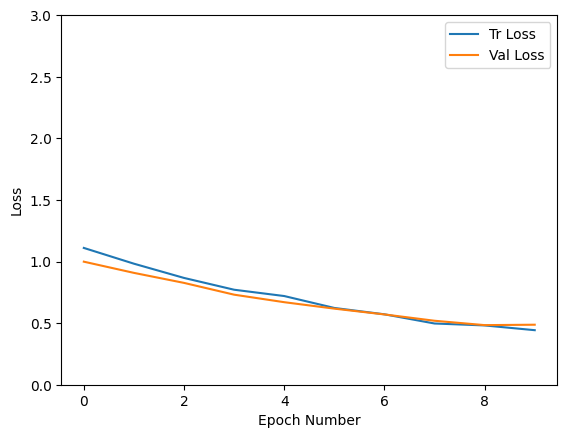

In [53]:
#Analyze the loss curve

def plot_loss(history):
  history = np.array(history)
  plt.plot(history[:,0:2])
  plt.legend(['Tr Loss', 'Val Loss'])
  plt.xlabel('Epoch Number')
  plt.ylabel('Loss')
  plt.ylim(0,3)
  # plt.savefig('cifar10_loss_curve.png')
  plt.show()

plot_loss(history)

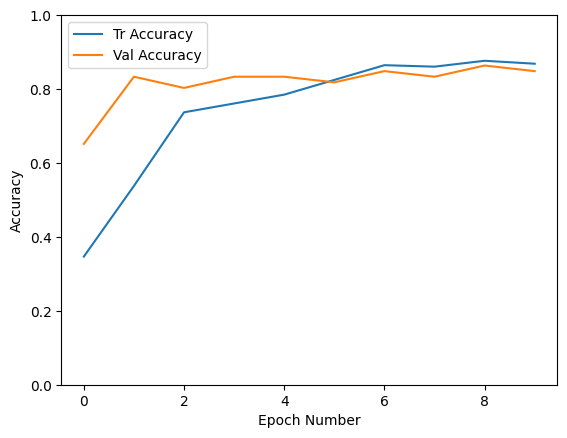

In [54]:
def plot_accuracy(history):
  history = np.array(history)
  plt.plot(history[:,2:4])
  plt.legend(['Tr Accuracy', 'Val Accuracy'])
  plt.xlabel('Epoch Number')
  plt.ylabel('Accuracy')
  plt.ylim(0,1)
  # plt.savefig('cifar10_accuracy_curve.png')
  plt.show()

plot_accuracy(history)

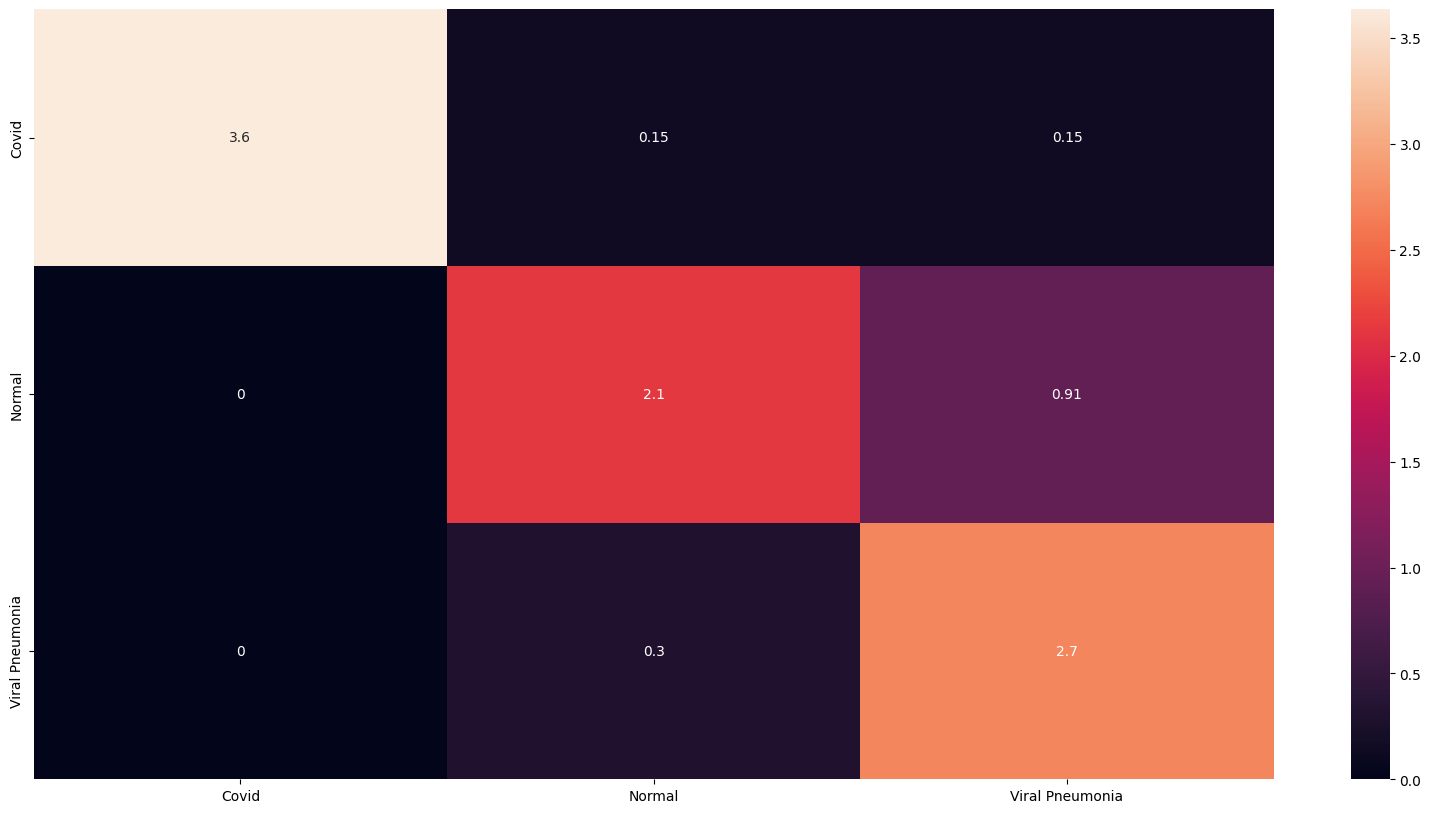

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

def plot_confusionMatrix(model, test_dataloader):

  y_pred = []
  y_true = []

  model.to('cpu')

  # iterate over test data
  for inputs, labels in test_dataloader:
          output = model(inputs) # Feed Network

          output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
          y_pred.extend(output) # Save Prediction

          labels = labels.data.cpu().numpy()
          y_true.extend(labels) # Save Truth

  # Build confusion matrix
  cf_matrix = confusion_matrix(y_true, y_pred)
  df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in class_names],
                      columns = [i for i in class_names])
  plt.figure(figsize = (20,10))
  sn.heatmap(df_cm, annot=True)
  # plt.savefig('output.png')

plot_confusionMatrix(model, test_dataloader)

c) Replace your defined ConvNet in b) with a pre-trained model. Then, proceed with a transfer learning and finetune the model for the COVID-19 dataset. **(10 marks)**

In [56]:
# IMPORT LIBRARY = TORCH, TORCHVISION (FOR CIFAR-10)
import torch
from torch import nn

import torchvision
from torchvision import datasets, models
import torch.optim as optim
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt        #for plotting purpose

In [57]:
# IMPORT FROM GDRIVE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
# Set random seed for reproducibility
torch.manual_seed(42)

In [59]:
# Setting Up the Hyperparameters
batch_size = 64
learning_rate = 0.001
epochs = 10

In [60]:
# LOAD THE 'FRUITS' DATASET

transform = transforms.Compose(
    #  transforms.Augmix(),
    #  transforms.CenterCrop(),
    [transforms.Resize((224,224)),
     transforms.ToTensor(),
     transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])]
)

# # Define a new transform that resizes to 32x32 and converts to grayscale
# new_transform = transforms.Compose([
#     transforms.Resize((32, 32)),  # Resize to 32x32
#     transforms.Grayscale(num_output_channels=1),  # Convert to grayscale (1 channel)
#     transforms.ToTensor(),  # Convert to tensor
#     transforms.Normalize([0.485], [0.229])  # Normalize if needed
# ])
train_dir = '/content/drive/MyDrive/Colab Notebooks/Covid19-dataset/train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/Covid19-dataset/test'

# train_dir = '/content/drive/MyDrive/Colab Notebooks/Pencil/train'
# test_dir = '/content/drive/MyDrive/Colab Notebooks/Pencil/test'

# train_dir = 'C:/Users/Muhd Raaid/Downloads/Compressed/Pencil//train'
# test_dir = 'C:/Users/Muhd Raaid/Downloads/Compressed/Pencil/test'



train_data = datasets.ImageFolder(root=train_dir,
                                  transform = transform)

test_data = datasets.ImageFolder(root=test_dir,
                                  transform = transform)

In [61]:
class_names = train_data.classes
class_names

['Covid', 'Normal', 'Viral Pneumonia']

In [62]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data,batch_size=4, shuffle=True)

test_dataloader = DataLoader(test_data,batch_size=4, shuffle=False)

In [63]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([4, 3, 224, 224]), torch.Size([4]))

In [64]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [65]:
import torch
import torchvision.models as models

# Load the pre-trained ResNet model
# Here we use ResNet18 for illustration, but you can choose other versions like ResNet34, ResNet50, etc.
model = models.resnet18(pretrained=True)

# Freeze the pre-trained layers, we don't want to fine-tune them
for param in model.parameters():
    param.requires_grad = False

# Replace the last fully connected layer with a new one with the number of classes you need
# ResNet18 uses a fully connected layer with 512 input features
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 3)  # Assuming we have 3 classes

# Move the model to GPU if available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Setup the loss function and optimizer
# Since we're only training the final layer, we only pass those parameters to the optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.fc.parameters(), lr=0.001, momentum=0.9)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 171MB/s]


In [66]:
import time
from tqdm.auto import tqdm

def train_and_validate(model, loss_criterion, optimizer, train_dataloader, test_dataloader, epochs=25, device='cuda'):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param train_dataloader: DataLoader for training data
        :param test_dataloader: DataLoader for test/validation data
        :param epochs: Number of epochs (default=25)
        :param device: Device to perform computations ('cuda' or 'cpu')

    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''

    start = time.time()
    history = []
    best_acc = 0.0

    for epoch in tqdm(range(epochs)):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))

        model.train()

        train_loss = 0.0
        train_acc = 0.0

        valid_loss = 0.0
        valid_acc = 0.0

        for i, (inputs, labels) in enumerate(train_dataloader):

            inputs = inputs.to(device)
            labels = labels.to(device)

            # Clean existing gradients
            optimizer.zero_grad()

            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)

            # Compute loss
            loss = loss_criterion(outputs, labels)

            # Backpropagate the gradients
            loss.backward()

            # Update the parameters
            optimizer.step()

            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)

            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))

            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))

            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)

        # Validation - No gradient tracking needed
        with torch.no_grad():

            model.eval()

            # Validation loop
            for j, (inputs, labels) in enumerate(test_dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)


        # Find average training loss and training accuracy
        avg_train_loss = train_loss / len(train_dataloader.dataset)
        avg_train_acc = train_acc / len(train_dataloader.dataset)

        # Find average validation loss and training accuracy
        avg_test_loss = valid_loss / len(test_dataloader.dataset)
        avg_test_acc = valid_acc / len(test_dataloader.dataset)

        history.append([avg_train_loss, avg_test_loss, avg_train_acc, avg_test_acc])

        epoch_end = time.time()

        print("Epoch : {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(epoch, avg_train_loss, avg_train_acc * 100, avg_test_loss, avg_test_acc * 100, epoch_end - epoch_start))

        # Save if the model has best accuracy till now
        if avg_test_acc > best_acc:
            best_acc = avg_test_acc
            best_model = model
            torch.save(best_model, 'best_model.pt')

    return best_model, history


In [67]:
# Train the model for 10 epochs

num_epochs = 10
model, history = train_and_validate(model, loss_fn, optimizer, train_dataloader, test_dataloader, num_epochs)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1/10
Epoch : 000, Training: Loss: 0.7776, Accuracy: 61.7530%, 
		Validation : Loss : 0.5608, Accuracy: 75.7576%, Time: 11.5558s
Epoch: 2/10
Epoch : 001, Training: Loss: 0.5560, Accuracy: 77.2908%, 
		Validation : Loss : 0.4823, Accuracy: 78.7879%, Time: 11.3648s
Epoch: 3/10
Epoch : 002, Training: Loss: 0.6260, Accuracy: 73.7052%, 
		Validation : Loss : 0.3215, Accuracy: 86.3636%, Time: 11.3592s
Epoch: 4/10
Epoch : 003, Training: Loss: 0.3963, Accuracy: 84.4622%, 
		Validation : Loss : 0.2265, Accuracy: 90.9091%, Time: 11.2626s
Epoch: 5/10
Epoch : 004, Training: Loss: 0.4468, Accuracy: 84.0637%, 
		Validation : Loss : 0.3907, Accuracy: 78.7879%, Time: 11.7016s
Epoch: 6/10
Epoch : 005, Training: Loss: 0.5267, Accuracy: 80.4781%, 
		Validation : Loss : 0.3640, Accuracy: 83.3333%, Time: 11.3060s
Epoch: 7/10
Epoch : 006, Training: Loss: 0.5218, Accuracy: 83.2669%, 
		Validation : Loss : 0.3189, Accuracy: 87.8788%, Time: 11.3510s
Epoch: 8/10
Epoch : 007, Training: Loss: 0.3955, Accura

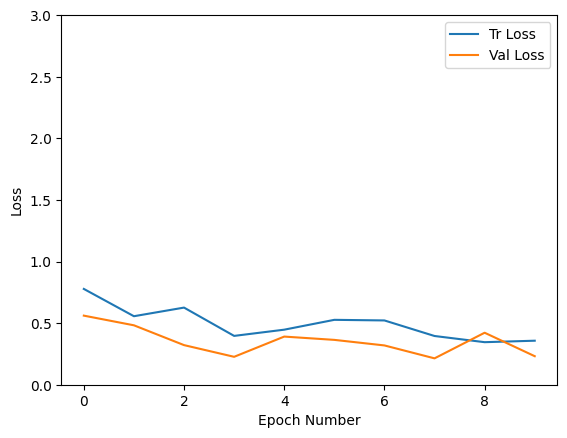

In [71]:
#Analyze the loss curve

def plot_loss(history):
  history = np.array(history)
  plt.plot(history[:,0:2])
  plt.legend(['Tr Loss', 'Val Loss'])
  plt.xlabel('Epoch Number')
  plt.ylabel('Loss')
  plt.ylim(0,3)
  # plt.savefig('cifar10_loss_curve.png')
  plt.show()

plot_loss(history)

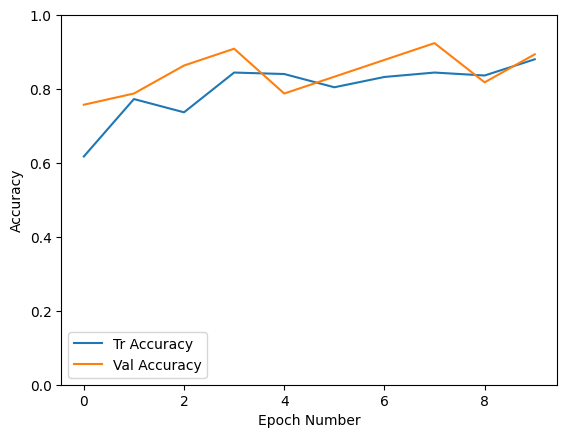

In [72]:
def plot_accuracy(history):
  history = np.array(history)
  plt.plot(history[:,2:4])
  plt.legend(['Tr Accuracy', 'Val Accuracy'])
  plt.xlabel('Epoch Number')
  plt.ylabel('Accuracy')
  plt.ylim(0,1)
  # plt.savefig('cifar10_accuracy_curve.png')
  plt.show()

plot_accuracy(history)

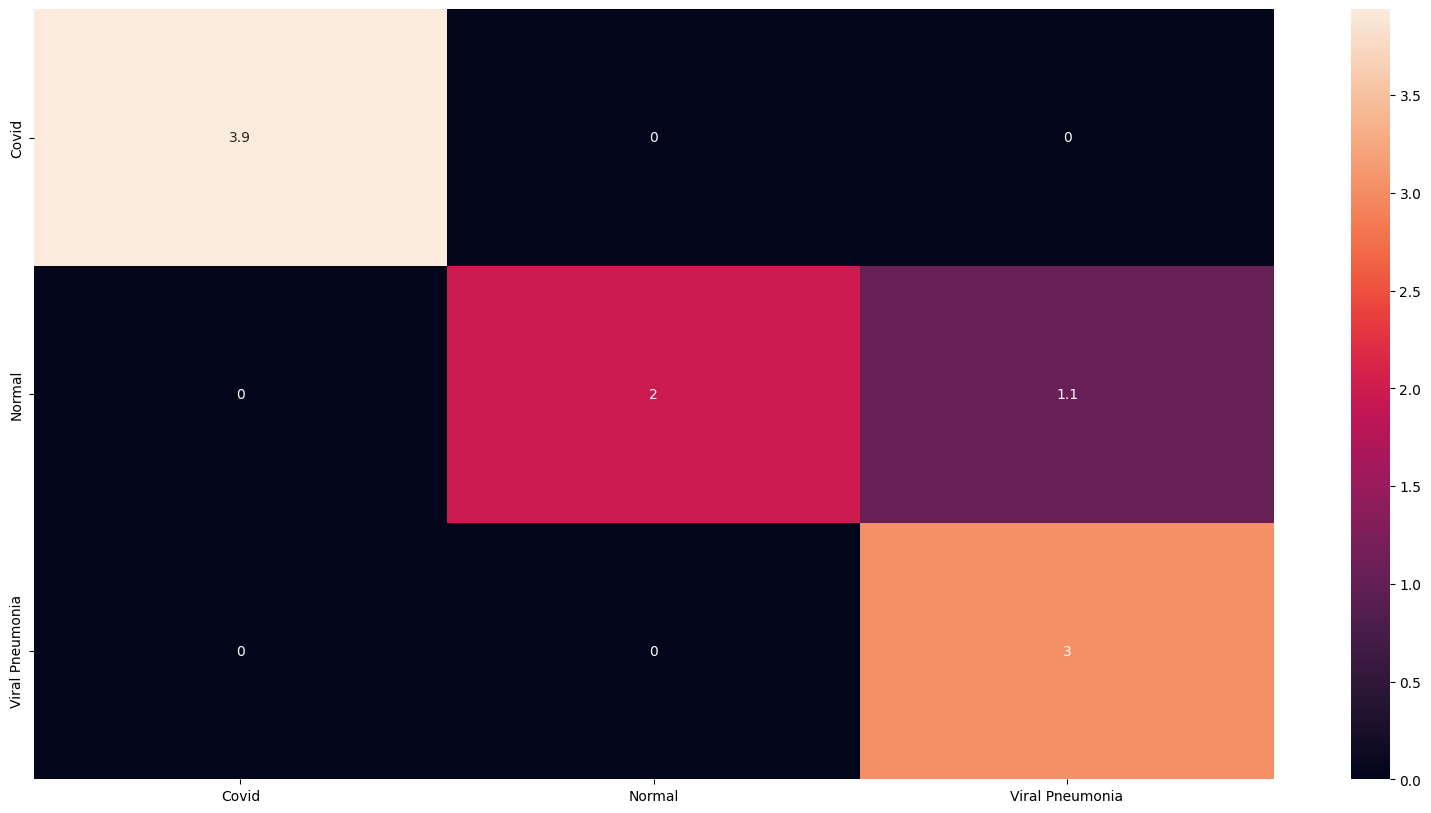

In [73]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

def plot_confusionMatrix(model, test_dataloader):

  y_pred = []
  y_true = []

  model.to('cpu')

  # iterate over test data
  for inputs, labels in test_dataloader:
          output = model(inputs) # Feed Network

          output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
          y_pred.extend(output) # Save Prediction

          labels = labels.data.cpu().numpy()
          y_true.extend(labels) # Save Truth

  # Build confusion matrix
  cf_matrix = confusion_matrix(y_true, y_pred)
  df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in class_names],
                      columns = [i for i in class_names])
  plt.figure(figsize = (20,10))
  sn.heatmap(df_cm, annot=True)
  # plt.savefig('output.png')

plot_confusionMatrix(model, test_dataloader)

d) Do you see any accuracy improvement? Whether it is a "yes" or "no", discuss the possible reasons contributing to the accuracy improvement/ unimprovement. **(4 marks)**

<span style="color:blue">
    Yes because pretrained model like ResNet18 has deeper neural network with 18 layers, was pretrained on larger datasets, has pre-trained weights, better feature learning capability thus much more robust than my custom, simpler CNN. These factors will generally improve accuracy of the model.</span>

**QUESTION 3** **[15 marks]**

In a machine vision project, you decide to design a door access control system based on hand gestures. Only those who shows the correct hand gesture will be granted the access. There are three gestures that are recognized as correct access passcode which are "shaka", "peace" and "thumbs up", as depicted in Fig. 2.

![pic](https://simplyorganizedhi.com/media/catalog/product/1/6/169500.jpg)

                                Fig. 2 Shaka,peace, and thumbs up


Using the end-to-end object detection pipeline that you have learned, develop your own hand gesture detector so that it can be incorporate to a door access control system.

Deliverable for this question is the model .pt file. Change the name to <your_name>.pt file (e.g. hasan.pt).

- Marks are given based on the performance of the model when tested using my machine and camera at my office. This question aims to evaluate the model's robustness and generalization capabilities.